# [通し課題]

8. DAY2、3で学んだことの取り組み • 交差検証、ホールドアウト法などで汎化性能を確認する  
 • 欠測値と異常値を確認し、適切に処理する  
 • DAY2、3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する  
 • 交差検証によるパラメータチューニングを行う  
 • パラメータチューニング後のモデルによって、精度および結果の評価を行う  
 • その他、精度の向上ができるような処理に取り組み、精度を上げる  
 • できたところまでをNotebookでまとめ、宿題として提出する  
 • 前回から取り組んだ内容・工夫、精度がどのように変化したかのコメントを Notebookに含めること  
 • 15分程度，受講者同士で通し課題の進捗を見せ合う時間を設けます  
9. DAY4では、DAY3宿題の提出ファイルを元に、最終発表を実施いただ

# 0. DAY1での実施事項


In [1]:
#********************************************************************
# pandas,numpy,matplotlib,codecs,sklearnの各ライブラリをインポート
#********************************************************************

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns

#********************************************************************
#.該当課題のデータを読み込む
#********************************************************************
#201801のデータを読み込んでみる
with cd.open('ks-projects-201801.csv', 'r', 'utf-8', 'ignore') as f18:
    df_f18 = pd.read_csv(f18)
#df_f18 = pd.read_csv('ks-projects-201801.csv')

#********************************************************************
#.欠損値がある行は、とりあえずなくしてみる
#********************************************************************
#１個でも欠損値がある行はとりあえず削除してみる。
df_f18_dna = df_f18.dropna(how='any')

#********************************************************************
#.成功（'successful'）と失敗（'failed'）に絞って考える。
#********************************************************************
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])

#********************************************************************
#.'state'をカテゴリ変数（文字列）から数値化してみる。
#********************************************************************
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#********************************************************************
#.ロジスティック回帰で分類してみる。
#　「goal」、「backers」を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_f18_SorF['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SorF[['goal', 'backers']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

#********************************************************************
#.予測精度または識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

2996 19902
103320 80771
Accuracy  = 88.938%
Recall    = 96.423%
Precision = 80.231%


## 0.1.他の説明変数についても考察してみる

Day1で考察した説明変数以外にも使える変数がないか考察してみる。

### 【仮説１】期間について成功、失敗に影響するのではないか？

In [2]:
import datetime as dt
# 'deadline' 'launched' の項目をdatetimeに変更
df_f18_SorF['deadline'] = pd.to_datetime(df_f18_SorF['deadline'], errors = 'coerce')
df_f18_SorF['launched'] = pd.to_datetime(df_f18_SorF['launched'], errors = 'coerce')
# 'deadline' 'launched' の間の日数を示す'period'を作成
df_f18_SorF['period'] = df_f18_SorF['deadline'] - df_f18_SorF['launched']

days = []

#'period'の日数を'days'に抽出
for i in df_f18_SorF.index:
    days.append(df_f18_SorF['period'][i].days)

df_f18_SorF['days'] = days
display(df_f18_SorF[['state','period','days']].head())


,state,period,days
5,1,34 days 10:21:33,34
6,1,19 days 05:29:16,19
11,1,29 days 17:17:02,29
14,1,27 days 04:15:42,27
18,1,14 days 09:48:28,14


In [3]:
#いったんCSVに出力する。
df_f18_SorF.to_csv("df_f18_SorF.csv")

In [1]:
#********************************************************************
# pandas,numpy,matplotlib,codecs,sklearnの各ライブラリをインポート
#********************************************************************

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns

#********************************************************************
#.該当課題のデータを読み込む
#********************************************************************
#201801のデータを読み込んでみる
with cd.open('df_f18_SorF.csv', 'r', 'utf-8', 'ignore') as f18:
    df_f18_SorF = pd.read_csv(f18)

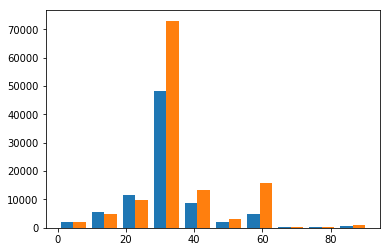

In [2]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれを'days'についてヒストグラムを書いてみる
plt.hist([df_f18_S["days"], df_f18_F["days"]], stacked=False)
plt.show()

プロジェクト期間が長いほうが成功している割合が高いことがわかった。  
プロジェクト期間（'days'）も説明変数として使ってみることとする。

### 【仮説２】countryについて成功、失敗に影響するのではないか。

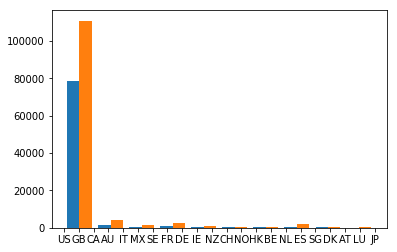

In [3]:
#それぞれを'country'についてヒストグラムを書いてみる
plt.hist([df_f18_S["country"], df_f18_F["country"]], stacked=False)
plt.show()

成功率が高い国と、低い国があることがわかった。

In [17]:
#'country'ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_ct = df_f18_SorF.groupby('country',as_index=False)
df_f18_gb_ct_mn = df_f18_gb_ct.mean()

#'state'は成功が'1',失敗が'0'なので、'country'毎の'state'の平均は
#その国の成功する割合（確率）と等価なので名称変更
df_f18_gb_ct_mn = df_f18_gb_ct_mn.rename(columns={'state': 'country_rate'}) 
display(df_f18_gb_ct_mn[['country','country_rate']])


#元のデータフレームに、国ごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SorF, df_f18_gb_ct_mn[['country','country_rate']], on='country')

,country,country_rate
0,AT,0.242812
1,AU,0.300825
2,BE,0.306306
3,CA,0.333850
4,CH,0.300000
5,DE,0.281844
6,DK,0.372414
7,ES,0.253475
8,FR,0.352086
9,GB,0.408828


国ごとの成功率(country_state_rate)も説明変数としてつかってみることにする。

### 【仮説３】category，main_categoryについて成功、失敗に影響するのではないか。

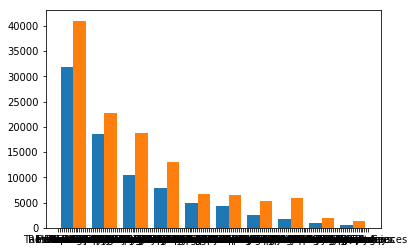

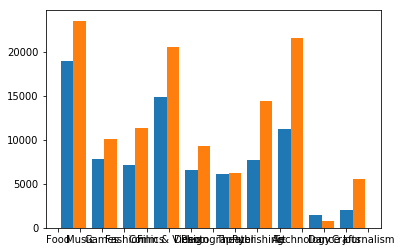

In [14]:
#それぞれを'days'についてヒストグラムを書いてみる
plt.hist([df_f18_S["category"], df_f18_F["category"]], stacked=False)
plt.show()
#それぞれを'days'についてヒストグラムを書いてみる
plt.hist([df_f18_S["main_category"], df_f18_F["main_category"]], stacked=False)
plt.show()

'country'同様にカテゴリーごとに成功率が違うことが分かった。  

In [18]:
#"main_category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_mc = df_f18_SorF.groupby("main_category",as_index=False)
df_f18_gb_mc_mn = df_f18_gb_mc.mean()

#'state'は成功が'1',失敗が'0'なので、'main_category'毎の'state'の平均は
#そのメインカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_mc_mn = df_f18_gb_mc_mn.rename(columns={'state': 'main_category_rate'}) 
display(df_f18_gb_mc_mn[['main_category','main_category_rate']])

#元のデータフレームに、国ごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SRate, df_f18_gb_mc_mn[['main_category','main_category_rate']], on='main_category')

,main_category,main_category_rate
0,Art,0.451686
1,Comics,0.587701
2,Crafts,0.275224
3,Dance,0.657432
4,Design,0.417008
5,Fashion,0.283365
6,Film & Video,0.418766
7,Food,0.273291
8,Games,0.439428
9,Journalism,0.245217


In [20]:
#"category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_cg = df_f18_SorF.groupby("category",as_index=False)
df_f18_gb_cg_mn = df_f18_gb_cg.mean()

#'state'は成功が'1',失敗が'0'なので、'category'毎の'state'の平均は
#そのカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_cg_mn = df_f18_gb_cg_mn.rename(columns={'state': 'category_rate'}) 
display(df_f18_gb_cg_mn[['category','category_rate']])

#元のデータフレームに、国ごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SRate, df_f18_gb_cg_mn[['category','category_rate']], on='category')

,category,category_rate
0,3D Printing,0.408451
1,Academic,0.264151
2,Accessories,0.373451
3,Action,0.199468
4,Animals,0.265823
5,Animation,0.301083
6,Anthologies,0.697228
7,Apparel,0.236663
8,Apps,0.072260
9,Architecture,0.279012


In [22]:
df_f18_SRate

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,backers,country,usd pledged,usd_pledged_real,usd_goal_real,period,days,country_rate,main_category_rate,category_rate
0,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 00:00:00,50000.0,2016-02-26 13:38:27,52375.00,...,224.0,US,52375.00,52375.00,50000.00,34 days 10:21:33.000000000,34,0.419743,0.273291,0.177678
1,46,1000183112,Hot Chicken Takes Over.,Restaurants,Food,USD,2014-10-16 00:00:00,40000.0,2014-09-16 02:31:08,63401.00,...,855.0,US,63401.00,63401.00,40000.00,29 days 21:28:52.000000000,29,0.419743,0.273291,0.177678
2,708,1003478705,The Wheelhouse: A Farm to Table Restaurant in ...,Restaurants,Food,USD,2016-09-15 00:00:00,10000.0,2016-08-16 16:57:46,10205.00,...,43.0,US,4435.00,10205.00,10000.00,29 days 07:02:14.000000000,29,0.419743,0.273291,0.177678
3,2605,1013385948,Seraphina Bistro,Restaurants,Food,USD,2015-08-27 00:00:00,1000.0,2015-07-28 18:37:40,1085.00,...,12.0,US,1085.00,1085.00,1000.00,29 days 05:22:20.000000000,29,0.419743,0.273291,0.177678
4,2845,1014767016,"Pasta Flyer:Traditional Italian,Japanese Style...",Restaurants,Food,USD,2014-07-05 00:00:00,85000.0,2014-06-10 16:02:37,89300.22,...,450.0,US,89300.22,89300.22,85000.00,24 days 07:57:23.000000000,24,0.419743,0.273291,0.177678
5,4090,1020994659,"Botanica Restaurant, Market & Magazine",Restaurants,Food,USD,2017-01-07 00:00:00,60000.0,2016-11-28 18:09:56,62000.00,...,166.0,US,2050.00,62000.00,60000.00,39 days 05:50:04.000000000,39,0.419743,0.273291,0.177678
6,4144,1021309408,APTEKA: Eastern European Kitchen + Bar,Restaurants,Food,USD,2015-05-04 00:00:00,40000.0,2015-04-03 15:16:20,50200.00,...,430.0,US,50200.00,50200.00,40000.00,30 days 08:43:40.000000000,30,0.419743,0.273291,0.177678
7,4214,1021662528,Mangia Macrina's Wood Fired Pizza is going Bri...,Restaurants,Food,USD,2016-08-01 00:00:00,20000.0,2016-06-29 05:04:29,21500.00,...,117.0,US,2852.00,21500.00,20000.00,32 days 18:55:31.000000000,32,0.419743,0.273291,0.177678
8,4597,1023507854,Official Rolling Smoke T-shirts,Restaurants,Food,USD,2015-01-06 00:00:00,700.0,2014-12-15 21:07:03,795.00,...,20.0,US,795.00,795.00,700.00,21 days 02:52:57.000000000,21,0.419743,0.273291,0.177678
9,4816,1024570207,LA BODEGA - by Salts,Restaurants,Food,USD,2017-02-06 00:00:00,40000.0,2016-12-28 02:05:00,40350.00,...,127.0,US,3220.00,40350.00,40000.00,39 days 21:55:00.000000000,39,0.419743,0.273291,0.177678


### 0.2 新たに'country_rate'、'main_bategory_rate'、'category_rate'を加えてロジスティック回帰で分類してみる。

In [26]:
#********************************************************************
#.ロジスティック回帰で分類してみる。
#　「goal」、「backers」を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_f18_SRate['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SRate[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

#********************************************************************
#.予測精度または識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

4235 14040
109182 79532
Accuracy  = 91.171%
Recall    = 94.944%
Precision = 84.996%


# １．交差検証、ホールドアウト法などで汎化性能を確認する  

###  1.1. 欠測値と異常値を確認し、適切に処理する 

###  1.2. DAY2、3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する

### 1.3. 交差検証によるパラメータチューニングを行う

### 1.4. パラメータチューニング後のモデルによって、精度および結果の評価を行う

### 1.5. その他、精度の向上ができるような処理に取り組み、精度を上げる

### 1.6. できたところまでをNotebookでまとめ、宿題として提出する  

### 1.7. 前回から取り組んだ内容・工夫、精度がどのように変化したかのコメントを Notebookに含めること 

### 1.8. 15分程度，受講者同士で通し課題の進捗を見せ合う時間を設けます